In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Let's clean the data

In [2]:
df = pd.read_csv('data/all_transactions.csv')
df.head(5)

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


Look at the types of the columns to see which ones may need to have their types changed.

In [3]:
df.dtypes

disclosure_year            int64
disclosure_date           object
transaction_date          object
owner                     object
ticker                    object
asset_description         object
type                      object
amount                    object
representative            object
district                  object
ptr_link                  object
cap_gains_over_200_usd      bool
dtype: object

disclosure_data and transaction_date can be represented in date time, but they are normal objects right now. 

In [4]:
df['disclosure_date'] = pd.to_datetime(df['disclosure_date'], errors = 'coerce')
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors = 'coerce')
df.dtypes

disclosure_year                    int64
disclosure_date           datetime64[ns]
transaction_date          datetime64[ns]
owner                             object
ticker                            object
asset_description                 object
type                              object
amount                            object
representative                    object
district                          object
ptr_link                          object
cap_gains_over_200_usd              bool
dtype: object

Let's clean the 'Hon. ' out of every rep's name so it becomes easier to read.

In [5]:
df['representative'] = df['representative'].str.replace('Hon. ', '')

/var/folders/3k/d13l9xy576xd1j71sdj55ttc0000gn/T/ipykernel_18471/1258939511.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['representative'] = df['representative'].str.replace('Hon. ', '')


Let's create a 'state' column so we can do groupby state if we need to in the future.

In [6]:
df['state'] = df['district'].str[:2]

All done!

In [25]:
df.head(5)

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,state
0,2021,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,NC
1,2021,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,NC
2,2021,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,NC
3,2021,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,NC
4,2021,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,CA


In [8]:
# df.to_csv('data/cleaned_all_transactions.csv')

## EDA Time

### Univariate Analysis

We need to look at the distributions of relevant columns separately by using DataFrame operations and drawing appropriate plots. ```value_counts()``` will help us understand the values of a column.

Let's explore the ``disclosure_year`` columm first

In [26]:
# call .value_counts on 'disclosure_year
df['disclosure_year'].value_counts()

2020    7379
2021    5520
2022    1303
Name: disclosure_year, dtype: int64

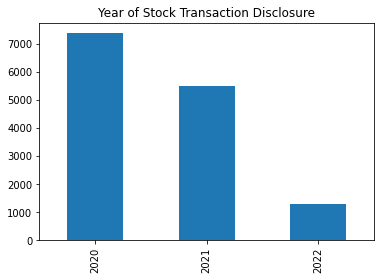

In [32]:
# first call .value_counts(), then .plot(), so graph is easier to read
df['disclosure_year'].value_counts().plot(kind = 'bar', \
    title = 'Year of Stock Transaction Disclosure');

Now let's look at the ```ticker``` column. There are too many individiual tickers (abbreviations used to uniquely identify shares of a particular stock), so we will only look at the top 20.

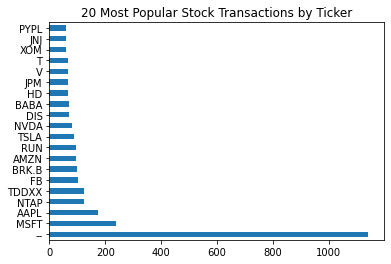

In [40]:
df['ticker'].value_counts()[:20].plot(kind = 'barh', \
    title = '20 Most Popular Stock Transactions by Ticker');

Clearly, the most popular stock trades are in tech:
* Microsoft
* Apple
* NetApp
* FaceBook (Meta?)
* Amazon
* Tesla
* and so on...

But there is even a Fed Fund:
*  BLF FedFund (TDDXX)


**Surprised rich people are investing in fed funds?**

**Hey, maybe the old people in the House of Representatives *really do care***
**about their retirement funds!**


The biggest surprise, however, is the most popular ticker, '--', which isn't even a stock. What is '--'? Let's do some further digging.